In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
import plotly.io as pio
pio.renderers.default ='notebook'

In [3]:
!pip install Pyppeteer
!pyppeteer-install

[INFO] Starting Chromium download.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "C:\Users\gkais\anaconda3\Scripts\pyppeteer-install.exe\__main__.py", line 7, in <module>
  File "C:\Users\gkais\anaconda3\Lib\site-packages\pyppeteer\command.py", line 14, in install
    download_chromium()
  File "C:\Users\gkais\anaconda3\Lib\site-packages\pyppeteer\chromium_downloader.py", line 138, in download_chromium
    extract_zip(download_zip(get_url()), DOWNLOADS_FOLDER / REVISION)
                ^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gkais\anaconda3\Lib\site-packages\pyppeteer\chromium_downloader.py", line 82, in download_zip
    raise OSError(f'Chromium downloadable not found at {url}: ' f'Received {r.data.decode()}.\n')
OSError: Chromium downloadable not found at https://storage.googleapis.com/chromium-browser-snapshots/Win_x64/1181205/chrome-win.zip: Received <?xml version='1.0' encoding='U

In [4]:
pwd

'C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500'

In [5]:
credits_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\credits.csv')
keywords_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\keywords.csv')
links_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\links.csv')
movies_metadata_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\movies_metadata.csv')
ratings_df = pd.read_csv('C:\\Users\\gkais\\Documents\\National University\\Masters_Data_Science\\ANA500\\ratings.csv')

C:\Users\gkais\AppData\Local\Temp\ipykernel_27744\3816661732.py:4: DtypeWarning:

Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.



In [6]:
credits_df.head()


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [7]:
keywords_df.head()


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [8]:
links_df.head()


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
movies_metadata_df.head()


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [10]:
ratings_df.head()


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


In [11]:
#Merge keywords df and credits df using 'id' as the joinning variable

crd_keyword_merged = pd.merge(credits_df, keywords_df, on= 'id', how= 'outer', suffixes=('','_key'))
                         
redundant_columns = [col for col in crd_keyword_merged.columns if col.endswith('_key')]

crd_keyword_merged = crd_keyword_merged.drop(columns=redundant_columns)

In [12]:
crd_keyword_merged.head()

,cast,crew,id,keywords
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [13]:
#The merging variable id is different for the 2 dataframes
print(movies_metadata_df['id'].dtype)
print(crd_keyword_merged['id'].dtype)

object
int64


In [14]:
movies_metadata_df['id'] = pd.to_numeric(movies_metadata_df['id'], errors='coerce')

In [15]:
# Drop any NaNs that might have resulted from conversion errors
movies_metadata_df.dropna(subset=['id'], inplace=True)

In [16]:
#Concat movies_metadata_df to a int type so the dataframes can be merged
movies_metadata_df['id'] = movies_metadata_df['id'].astype(int)

In [17]:
#Merge credits/keywords df and movie_meta df using 'id' as the joinning variable

meta_crd_keyword_merged = pd.merge(movies_metadata_df, crd_keyword_merged, on= 'id', how= 'outer', suffixes=('','_merge'))
                         
redundant_columns = [col for col in meta_crd_keyword_merged.columns if col.endswith('_merge')]

meta_crd_keyword_merged = meta_crd_keyword_merged.drop(columns=redundant_columns)

In [18]:
meta_crd_keyword_merged.head() 

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [19]:
meta_crd_keyword_merged.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'cast', 'crew', 'keywords'],
      dtype='object')

In [20]:
# Merge meta_crd_keyword_links_merged with links on 'id'
meta_crd_keyword_links_merged = pd.merge(meta_crd_keyword_merged, links_df, left_on='id', right_on='movieId', how='left', suffixes=('','_link'))

redundant_columns = [col for col in meta_crd_keyword_links_merged.columns if col.endswith('_link')]

meta_crd_keyword_links_merged = meta_crd_keyword_links_merged.drop(columns=redundant_columns)


In [21]:
meta_crd_keyword_links_merged.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,title,video,vote_average,vote_count,cast,crew,keywords,movieId,imdbId,tmdbId
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",8844.0,78763.0,42164.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",NaN,NaN,NaN
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'id': 818, 'name': 'based on novel'}, {'id':...",NaN,NaN,NaN
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...","[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...",NaN,NaN,NaN


In [22]:
# Ensure that movieId and tmdbId are of the same type
ratings_df['movieId'] = pd.to_numeric(ratings_df['movieId'], errors='coerce')
ratings_df.dropna(subset=['movieId'], inplace=True)
ratings_df['movieId'] = ratings_df['movieId'].astype(int)

In [23]:
# Now perform the merge
final_combined_df = pd.merge(meta_crd_keyword_links_merged, ratings_df, left_on='id', right_on='movieId', how='left')

In [24]:
final_combined_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,cast,crew,keywords,movieId_x,imdbId,tmdbId,userId,movieId_y,rating,timestamp
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,1923.0,862.0,3.0,858335006.0
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,2103.0,862.0,5.0,946044912.0
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,5380.0,862.0,1.0,878941641.0
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,6177.0,862.0,4.0,859415226.0
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",862.0,116985.0,88224.0,6525.0,862.0,4.0,857388995.0


In [25]:
#Remove duplicate row
del final_combined_df['movieId_x']

In [26]:
#Remove duplicate row
del final_combined_df['movieId_y']

In [27]:
print(type(final_combined_df['genres']))


<class 'pandas.core.series.Series'>


In [28]:
#Extract the genre tags from the series data

import ast 

final_combined_df['genres'] = final_combined_df['genres'].apply(ast.literal_eval)
final_combined_df['genre'] = final_combined_df['genres'].apply(lambda x: ' '.join([genre['name'] for genre in x]))

In [29]:
#Extract the production companies from the series data
final_combined_df['production_companies'] = final_combined_df['production_companies'].fillna('[]')

final_combined_df['production_companies'] = final_combined_df['production_companies'].apply(ast.literal_eval)

final_combined_df['production_company'] = final_combined_df['production_companies'].apply(lambda x: ' '.join([production_company['name'] for production_company in x]))

In [30]:
#Extract the production countries from the series data

final_combined_df['production_countries'] = final_combined_df['production_countries'].fillna('[]')

final_combined_df['production_countries'] = final_combined_df['production_countries'].apply(ast.literal_eval)

final_combined_df['production_country'] = final_combined_df['production_countries'].apply(lambda x: ' '.join([production_country['name'] for production_country in x]))

In [31]:
final_df = final_combined_df

In [32]:
final_df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,crew,keywords,imdbId,tmdbId,userId,rating,timestamp,genre,production_company,production_country
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,1923.0,3.0,858335006.0,Animation Comedy Family,Pixar Animation Studios,United States of America
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,2103.0,5.0,946044912.0,Animation Comedy Family,Pixar Animation Studios,United States of America
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,5380.0,1.0,878941641.0,Animation Comedy Family,Pixar Animation Studios,United States of America
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,6177.0,4.0,859415226.0,Animation Comedy Family,Pixar Animation Studios,United States of America
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",116985.0,88224.0,6525.0,4.0,857388995.0,Animation Comedy Family,Pixar Animation Studios,United States of America


In [33]:
#Remove duplicate variables. and cast/crew since they contain infomation not being used in the analysis. 
del final_df['genres']
del final_df['production_companies']
del final_df['production_countries']
del final_df['cast']
del final_df['crew']
del final_df['keywords']
del final_df['overview']
del final_df['imdb_id']
del final_df['poster_path']
del final_df['tagline']
del final_df['tmdbId']
del final_df['spoken_languages']

In [34]:
final_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'homepage', 'id',
       'original_language', 'original_title', 'popularity', 'release_date',
       'revenue', 'runtime', 'status', 'title', 'video', 'vote_average',
       'vote_count', 'imdbId', 'userId', 'rating', 'timestamp', 'genre',
       'production_company', 'production_country'],
      dtype='object')

In [35]:
final_df.head()

,adult,belongs_to_collection,budget,homepage,id,original_language,original_title,popularity,release_date,revenue,...,video,vote_average,vote_count,imdbId,userId,rating,timestamp,genre,production_company,production_country
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,1923.0,3.0,858335006.0,Animation Comedy Family,Pixar Animation Studios,United States of America
1,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,2103.0,5.0,946044912.0,Animation Comedy Family,Pixar Animation Studios,United States of America
2,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,5380.0,1.0,878941641.0,Animation Comedy Family,Pixar Animation Studios,United States of America
3,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,6177.0,4.0,859415226.0,Animation Comedy Family,Pixar Animation Studios,United States of America
4,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,http://toystory.disney.com/toy-story,862,en,Toy Story,21.946943,1995-10-30,373554033.0,...,False,7.7,5415.0,116985.0,6525.0,4.0,857388995.0,Animation Comedy Family,Pixar Animation Studios,United States of America


In [36]:
final_df.isnull().sum()

adult                          0
belongs_to_collection    8758519
budget                         0
homepage                 8740226
id                             0
original_language             22
original_title                 0
popularity                     4
release_date                7113
revenue                        4
runtime                     1288
status                       941
title                          4
video                          4
vote_average                   4
vote_count                     4
imdbId                     38862
userId                     38932
rating                     38932
timestamp                  38932
genre                          0
production_company             0
production_country             0
dtype: int64

In [37]:
#Create a binary variable for the 'belongs to collection' variable. 0 = false, 1 = true
final_df['belongs_to_collection_binary'] = final_df['belongs_to_collection'].notnull().astype(int)

final_df = final_df.drop(columns=['belongs_to_collection'])

In [38]:
#Create a binary variable for the 'homepage' variable. 0 = false, 1 = true
final_df['homepage_binary'] = final_df['homepage'].notnull().astype(int)

final_df = final_df.drop(columns=['homepage'])

In [39]:
#Remove data that does not contain a rating since this is our primary outcome variable
final_df = final_df.dropna(subset=['rating'])

In [40]:
#View the unique values of the status variable

unique_values = final_df['status'].unique()
print(unique_values)

['Released' 'Rumored' nan 'In Production' 'Post Production']


In [41]:
#Remove the 866 cases that do not have a status listed. Status is a useful categorical variable to analyse the movies' user rating, and would create bias if put in an imputted category.
final_df = final_df.dropna(subset=['status'])

In [42]:
#Convert release date variable to a date field
final_df['release_date'] = pd.to_datetime(final_df['release_date'], errors='coerce')

In [43]:
#Imputate the missing values of runtime and release date. Runtime represents the length of the film so imputting the average length of all the films would fill the missing values and keep the integrity of the data. 
#Release date is a little more difficult. I used the mean as well to keep the release date balanced since it covers a wide range of dates.
final_df = final_df.fillna({
    'runtime': final_df['runtime'].mean(),
    'release_date': final_df['release_date'].mean(),
    'original_language': final_df['original_language'].mode()[0]
    })

In [44]:
final_df.isnull().sum()

adult                           0
budget                          0
id                              0
original_language               0
original_title                  0
popularity                      0
release_date                    0
revenue                         0
runtime                         0
status                          0
title                           0
video                           0
vote_average                    0
vote_count                      0
imdbId                          0
userId                          0
rating                          0
timestamp                       0
genre                           0
production_company              0
production_country              0
belongs_to_collection_binary    0
homepage_binary                 0
dtype: int64

In [45]:
final_df.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,vote_count,imdbId,userId,rating,timestamp,genre,production_company,production_country,belongs_to_collection_binary,homepage_binary
0,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,1923.0,3.0,858335006.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
1,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,2103.0,5.0,946044912.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
2,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,5380.0,1.0,878941641.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
3,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6177.0,4.0,859415226.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1
4,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6525.0,4.0,857388995.0,Animation Comedy Family,Pixar Animation Studios,United States of America,1,1


In [46]:
final_df.columns

Index(['adult', 'budget', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'revenue', 'runtime', 'status', 'title',
       'video', 'vote_average', 'vote_count', 'imdbId', 'userId', 'rating',
       'timestamp', 'genre', 'production_company', 'production_country',
       'belongs_to_collection_binary', 'homepage_binary'],
      dtype='object')

In [47]:
copy_df = final_df

In [48]:
 final_df = copy_df

In [49]:
final_df['genre'] = final_df['genre'].str.split()

In [50]:
final_df.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,status,...,vote_count,imdbId,userId,rating,timestamp,genre,production_company,production_country,belongs_to_collection_binary,homepage_binary
0,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,1923.0,3.0,858335006.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
1,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,2103.0,5.0,946044912.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
2,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,5380.0,1.0,878941641.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
3,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6177.0,4.0,859415226.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1
4,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Released,...,5415.0,116985.0,6525.0,4.0,857388995.0,"[Animation, Comedy, Family]",Pixar Animation Studios,United States of America,1,1


In [51]:
# Get unique genres
unique_genres = set([genre for sublist in final_df['genre'] for genre in sublist])

In [52]:
# Create binary columns for each genre
for genre in unique_genres:
    final_df[genre] = final_df['genre'].apply(lambda x: 1 if genre in x else 0)

In [53]:
del final_df['genre']
del final_df['original_title']

In [54]:
final_df.columns

Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'title', 'video',
       'vote_average', 'vote_count', 'imdbId', 'userId', 'rating', 'timestamp',
       'production_company', 'production_country',
       'belongs_to_collection_binary', 'homepage_binary', 'History', 'Fantasy',
       'Mystery', 'Horror', 'War', 'Western', 'Fiction', 'TV', 'Crime',
       'Drama', 'Movie', 'Animation', 'Action', 'Family', 'Documentary',
       'Romance', 'Science', 'Music', 'Adventure', 'Comedy', 'Foreign',
       'Thriller'],
      dtype='object')

In [55]:
#Obtain dummy variables for the different categories of status
final_df = pd.get_dummies(final_df, columns=['status'])

In [56]:
#View all columns using head()
pd.set_option('display.max_columns', None)

In [205]:
final_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,userId,rating,timestamp,production_company,production_country,belongs_to_collection_binary,homepage_binary,History,Fantasy,Mystery,Horror,War,Western,Fiction,TV,Crime,Drama,Movie,Animation,Action,Family,Documentary,Romance,Science,Music,Adventure,Comedy,Foreign,Thriller,status_In Production,status_Post Production,status_Released,status_Rumored
0,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,1923.00,3.00,858335006.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False
1,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,2103.00,5.00,946044912.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False
2,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,5380.00,1.00,878941641.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False
3,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,6177.00,4.00,859415226.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False
4,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,6525.00,4.00,857388995.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False


In [206]:
final_df.shape

(11449050, 46)

In [207]:
# Convert 'budget' column to numeric data type
final_df['budget'] = pd.to_numeric(final_df['budget'], errors='coerce')

In [208]:
# Save the current float formatting
current_float_format = pd.options.display.float_format

# Set custom float formatting function
pd.options.display.float_format = '{:.2f}'.format

In [209]:
# Calculate the mean rating for each movie
mean_ratings = final_df.groupby('id')['rating'].mean().reset_index()
mean_ratings.rename(columns={'rating': 'mean_rating'}, inplace=True)

# Drop duplicate rows based on the movie identifier, keeping only necessary columns
movies_df = final_df.drop_duplicates(subset='id').drop(columns=['userId', 'rating', 'timestamp'])

# Merge the mean ratings with the movies DataFrame
merged_df = movies_df.merge(mean_ratings, on='id')

merged_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,production_company,production_country,belongs_to_collection_binary,homepage_binary,History,Fantasy,Mystery,Horror,War,Western,Fiction,TV,Crime,Drama,Movie,Animation,Action,Family,Documentary,Romance,Science,Music,Adventure,Comedy,Foreign,Thriller,status_In Production,status_Post Production,status_Released,status_Rumored,mean_rating
0,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False,3.60
1,False,65000000,8844,en,17.02,1995-12-15,262797249.00,104.00,Jumanji,False,6.90,2413.00,78763.00,TriStar Pictures Teitler Film Interscope Commu...,United States of America,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,False,True,False,3.76
2,False,60000000,949,en,17.92,1995-12-15,187436818.00,170.00,Heat,False,7.70,1886.00,48028.00,Regency Enterprises Forward Pass Warner Bros.,United States of America,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,False,False,True,False,3.91
3,False,58000000,710,en,14.69,1995-11-16,352194034.00,130.00,GoldenEye,False,6.60,1194.00,115851.00,United Artists Eon Productions,United Kingdom United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,False,False,True,False,2.74
4,False,98000000,1408,en,7.28,1995-12-22,10017322.00,119.00,Cutthroat Island,False,5.70,137.00,104691.00,Le Studio Canal+ Laurence Mark Productions Met...,France Germany Italy United States of America,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,False,False,True,False,3.71


In [210]:
# Select numerical variables from the DataFrame
numerical_vars = ['budget', 'popularity', 'runtime', 'vote_average', 'vote_count','mean_rating']

# DataFrame with the first entry of numerical variables
numerical_df = merged_df[numerical_vars]

# Calculate the correlation between numerical variables and the mean rating
correlation_matrix = numerical_df.corr()

# Print correlation matrix
print("Correlation matrix:")
print(correlation_matrix)

Correlation matrix:
              budget  popularity  runtime  vote_average  vote_count  \
budget          1.00        0.55     0.21          0.10        0.64   
popularity      0.55        1.00     0.26          0.27        0.73   
runtime         0.21        0.26     1.00          0.20        0.19   
vote_average    0.10        0.27     0.20          1.00        0.19   
vote_count      0.64        0.73     0.19          0.19        1.00   
mean_rating     0.01        0.05     0.02          0.06        0.03   

              mean_rating  
budget               0.01  
popularity           0.05  
runtime              0.02  
vote_average         0.06  
vote_count           0.03  
mean_rating          1.00  


In [211]:
print("Descriptive stats for Rating Variable:")
merged_df['mean_rating'].describe()

Descriptive stats for Rating Variable:


count   7554.00
mean       3.13
std        0.62
min        0.50
25%        2.80
50%        3.23
75%        3.55
max        5.00
Name: mean_rating, dtype: float64

In [212]:
# Calculate descriptive statistics for the 'budget' column
budget_stats = merged_df['budget'].describe()

print("Budget statistics:")
print(budget_stats)

Budget statistics:
count        7554.00
mean      8138297.77
std      24737849.16
min             0.00
25%             0.00
50%             0.00
75%        850000.00
max     380000000.00
Name: budget, dtype: float64


In [213]:
#Descriptive stats for Numerical Variables
numeric_stats = numerical_df.describe()

print("Descriptive stats for Numerical Variables:")
print(numeric_stats)

Descriptive stats for Numerical Variables:
            budget  runtime  vote_average  vote_count  mean_rating
count      7554.00  7554.00       7554.00     7554.00      7554.00
mean    8138297.77    98.55          5.88      240.22         3.13
std    24737849.16    35.18          1.77      784.53         0.62
min           0.00     0.00          0.00        0.00         0.50
25%           0.00    88.00          5.30        4.00         2.80
50%           0.00    97.00          6.20       13.00         3.23
75%      850000.00   110.00          7.00       86.00         3.55
max   380000000.00   877.00         10.00    14075.00         5.00


In [214]:
genres = ['War','Mystery','Romance','Documentary','Foreign','Thriller','Adventure',
'Animation','Family','Drama','Music','Horror','Comedy','Fiction','Action',
'History','Movie','Western','TV','Crime','Fantasy','Science']

# Sum the values in each genre column to get the total number of movies in each genre
genre_counts = merged_df[genres].sum()

C:\Users\gkais\AppData\Local\Temp\ipykernel_27744\1802027045.py:24: UserWarning:

FixedFormatter should only be used together with FixedLocator



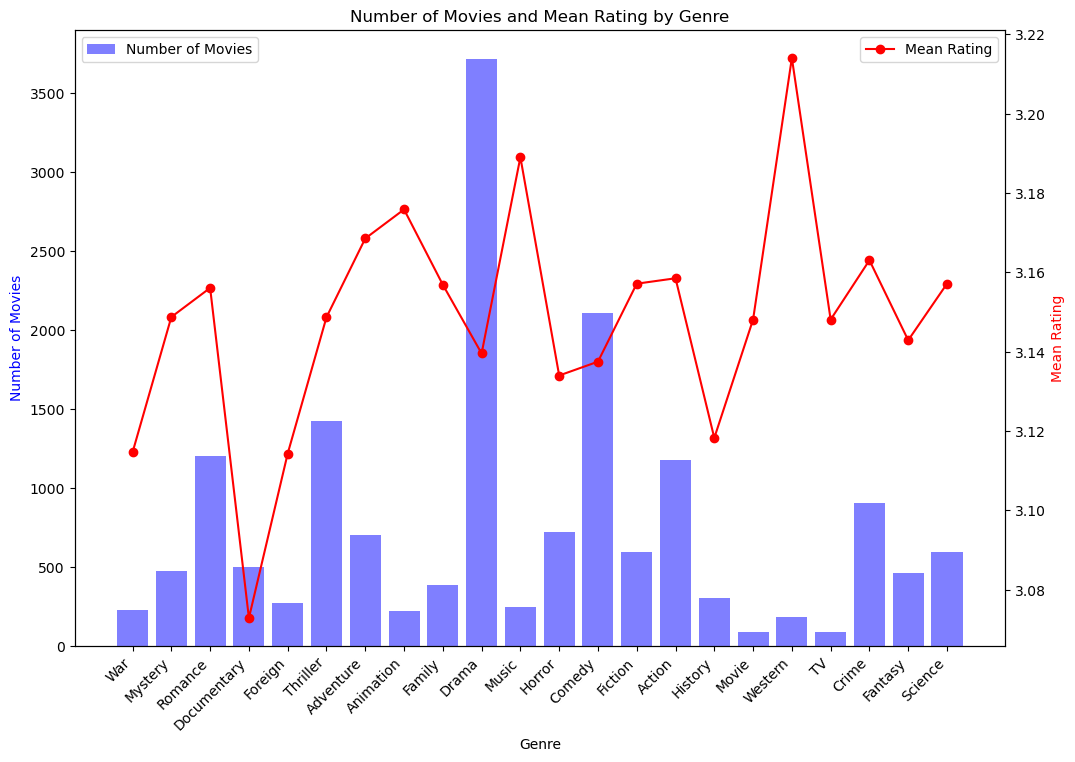

In [215]:
# Select only the relevant columns for genres and mean rating
genre_ratings = merged_df[genres + ['mean_rating']]

# Calculate the total number of movies in each genre
genre_counts = genre_ratings[genres].sum()

# Create a list of mean ratings corresponding to each genre
genre_mean_ratings = [genre_ratings[genre_ratings[genre] == 1]['mean_rating'].mean() for genre in genres]

# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot bar chart for genre counts
ax1.bar(genres, genre_counts, color='b', alpha=0.5, label='Number of Movies')

# Create a second y-axis for mean ratings
ax2 = ax1.twinx()
ax2.plot(genres, genre_mean_ratings, color='r', marker='o', label='Mean Rating')

# Set labels and title
ax1.set_xlabel('Genre')
ax1.set_ylabel('Number of Movies', color='b')
ax2.set_ylabel('Mean Rating', color='r')
ax1.set_xticklabels(genres, rotation=45, ha='right')
plt.title('Number of Movies and Mean Rating by Genre')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

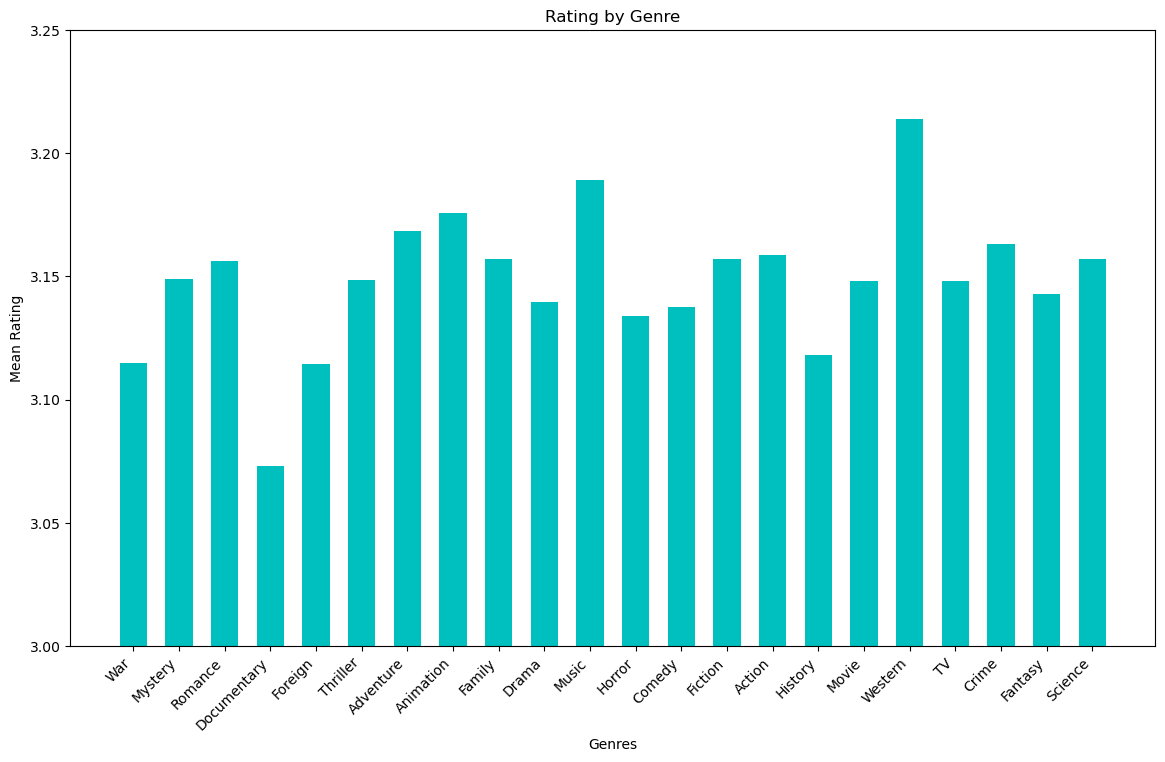

In [216]:
# Select only the relevant columns for genres and mean rating
genre_ratings = merged_df[genres + ['mean_rating']]

# Create a list of mean ratings corresponding to each genre
genre_mean_ratings = [genre_ratings[genre_ratings[genre] == 1]['mean_rating'].mean() for genre in genres]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot bar chart for mean ratings
bar_width = 0.6
index = np.arange(len(genres))
bar = ax.bar(index, genre_mean_ratings, bar_width, color='c', label='Mean Rating')

# Set labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Mean Rating')
ax.set_title('Rating by Genre')
ax.set_xticks(index)
ax.set_xticklabels(genres, rotation=45, ha='right')

# Zoom in on the y-axis
ax.set_ylim(3, 3.25)  # Adjust these limits based on the range of your mean ratings

# Show plot
plt.show()

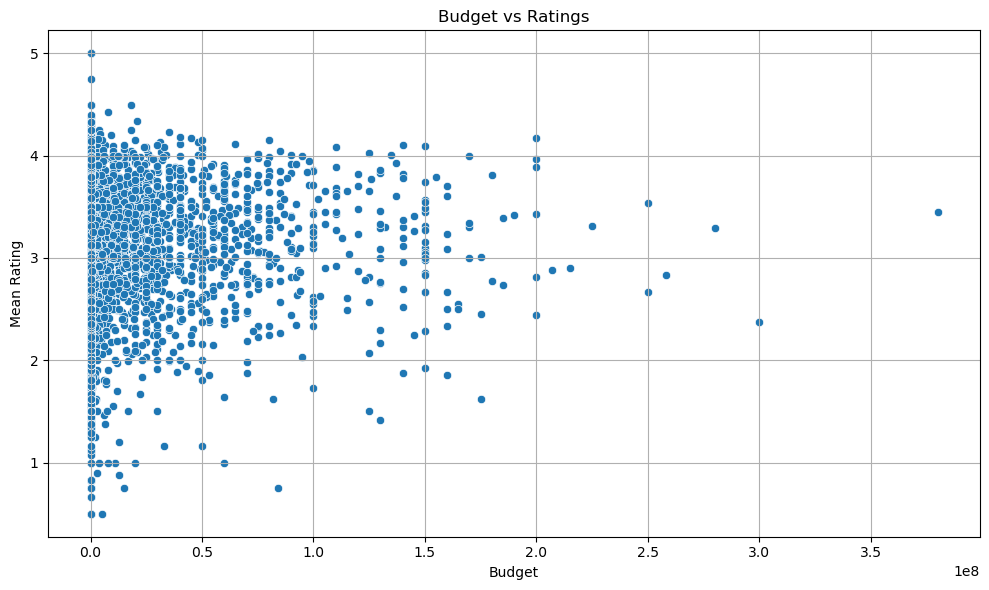

In [217]:
# Create a scatter plot of budget vs ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='budget', y='mean_rating')
plt.title('Budget vs Ratings')
plt.xlabel('Budget')
plt.ylabel('Mean Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

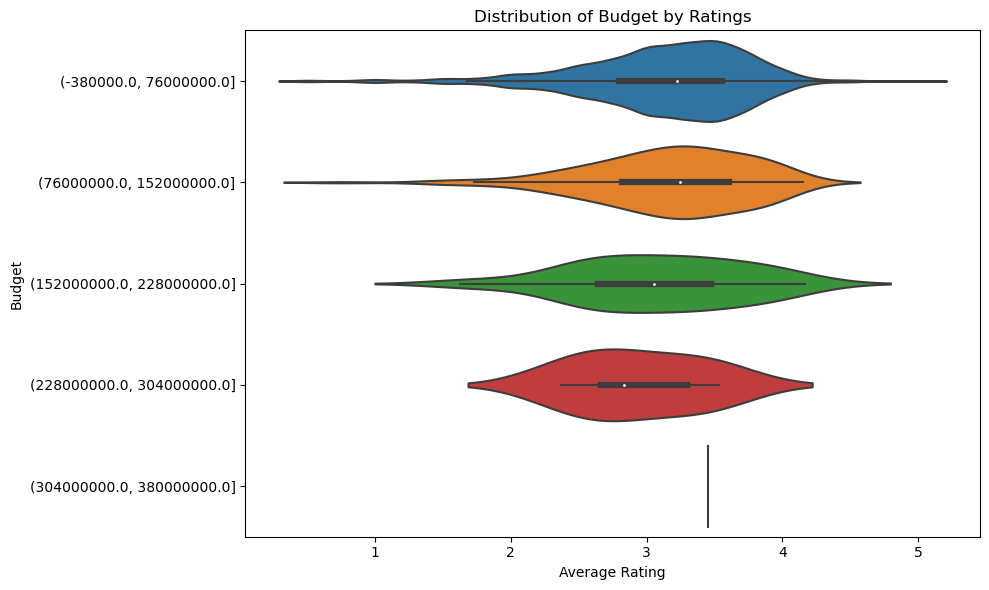

In [218]:
# Define the budget ranges
budget_ranges = pd.cut(merged_df['budget'], bins=5)  # Split budget into 5 equal-sized ranges

# Create a violin plot of ratings for each budget range
plt.figure(figsize=(10, 6))
sns.violinplot(x=merged_df['mean_rating'], y=budget_ranges)
plt.title('Distribution of Budget by Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Budget')
plt.tight_layout()
plt.show()

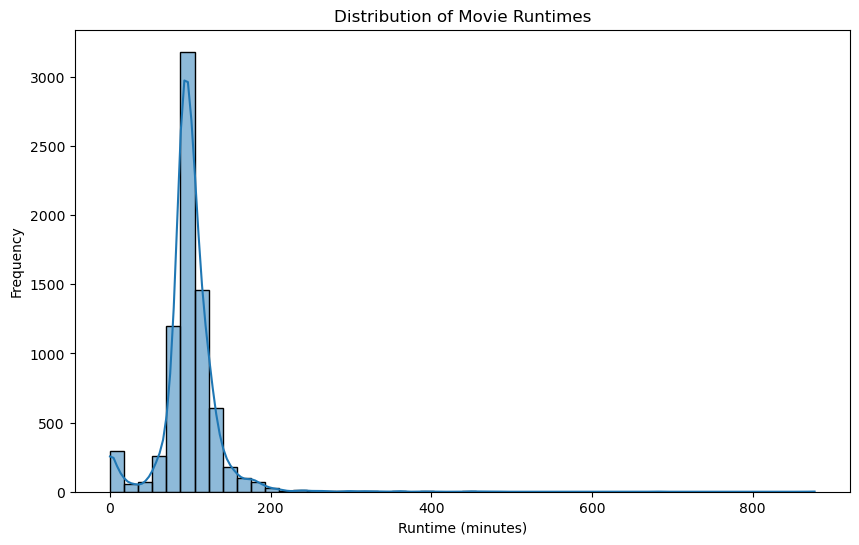

In [219]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['runtime'], bins=50, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

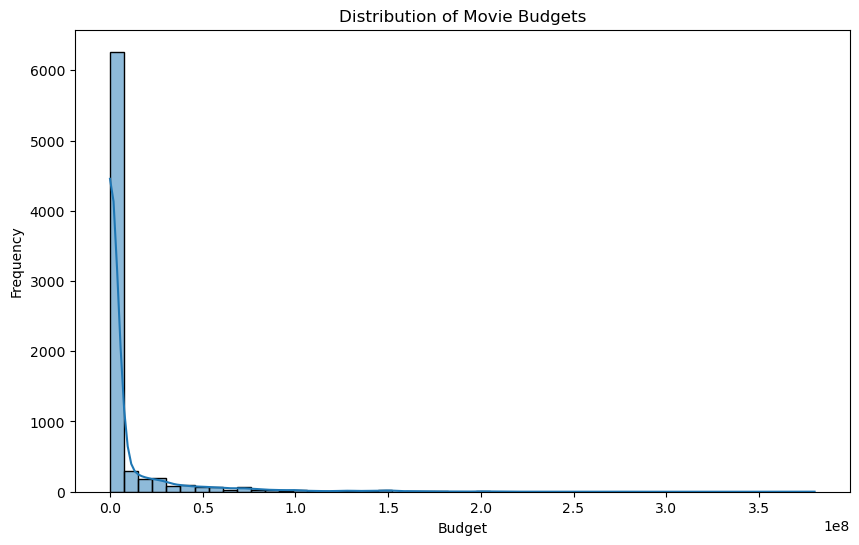

In [220]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['budget'], bins=50, kde=True)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

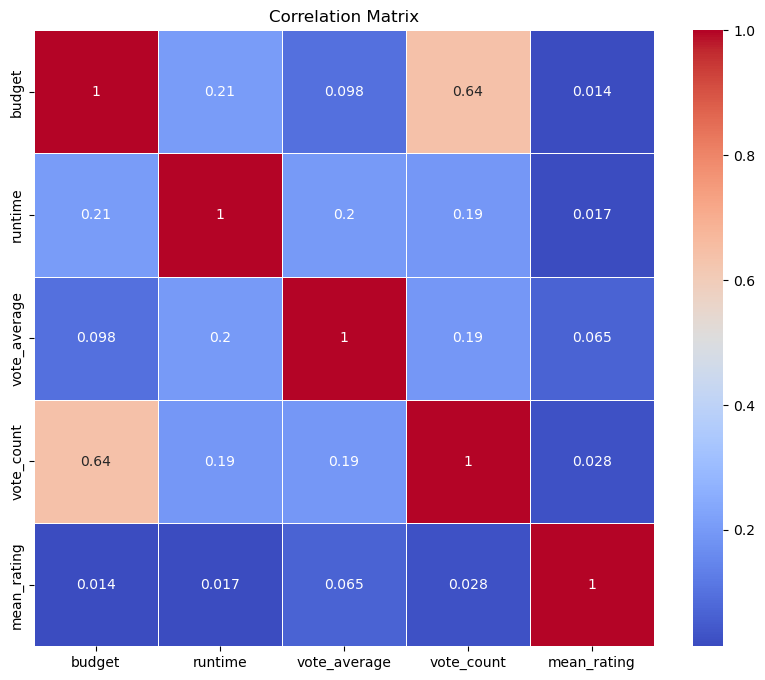

In [221]:
plt.figure(figsize=(10, 8))
corr_matrix = merged_df[['budget', 'runtime', 'vote_average', 'vote_count', 'mean_rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

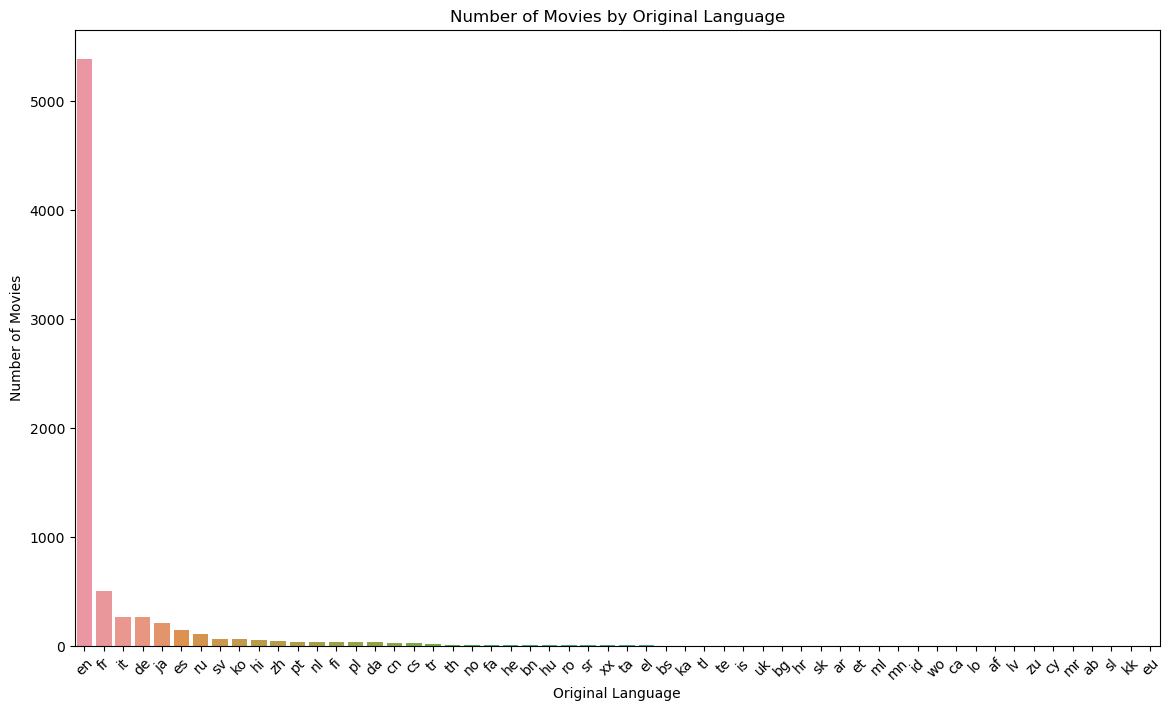

In [222]:
# Plot the bar graph of movie count by 'Original Language'
plt.figure(figsize=(14, 8))
language_counts = merged_df['original_language'].value_counts()
sns.barplot(x=language_counts.index, y=language_counts.values)
plt.title('Number of Movies by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

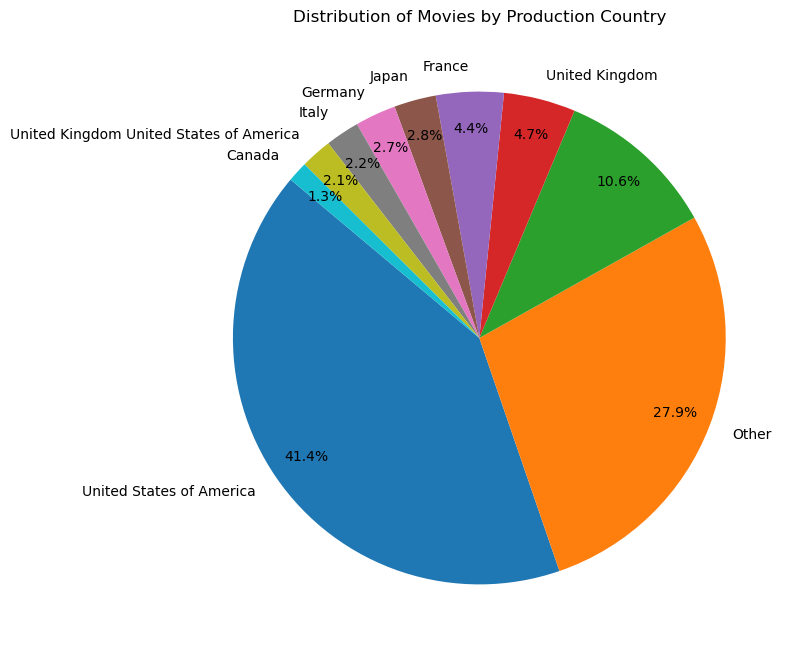

In [223]:
# Calculate the percentage of movies for each production country
country_counts = merged_df['production_country'].value_counts()
total_movies = country_counts.sum()
country_percentages = (country_counts / total_movies) * 100

# Group countries with less than 1.3% into 'Other'
threshold = 1.3
small_countries = country_percentages[country_percentages < threshold].index
merged_df['production_country'] = merged_df['production_country'].apply(
    lambda x: 'Other' if x in small_countries else x
)

# Recalculate the counts including 'Other'
country_counts = merged_df['production_country'].value_counts()

# Pie chart
plt.figure(figsize=(12, 8))
plt.pie(country_counts.values, labels=country_counts.index, autopct='%1.1f%%', pctdistance=0.85, startangle=140)
plt.title('Distribution of Movies by Production Country')
plt.show()

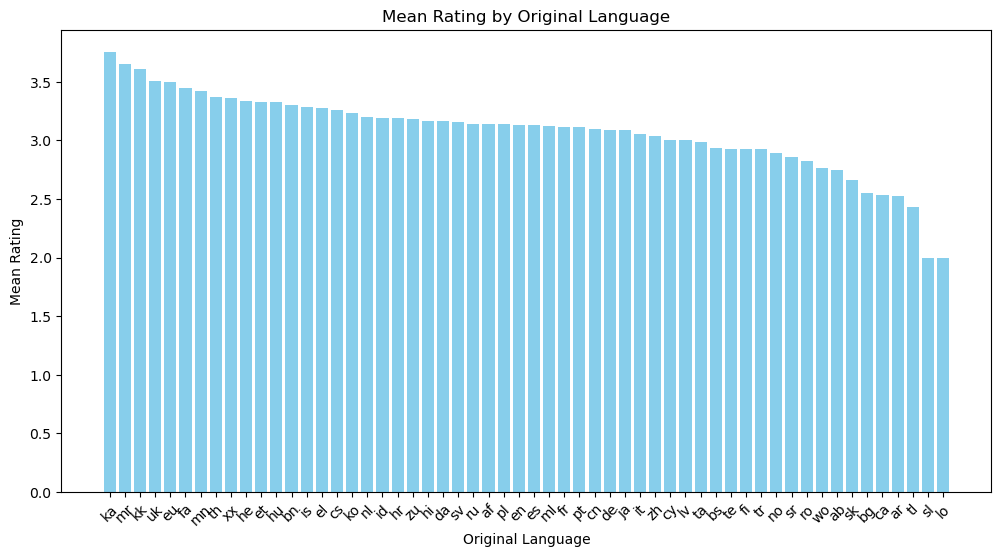

In [224]:
# Group the data by original language and calculate mean rating
mean_rating_by_language = merged_df.groupby('original_language')['mean_rating'].mean().reset_index()

# Sort the data by mean rating
mean_rating_by_language = mean_rating_by_language.sort_values(by='mean_rating', ascending=False)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(mean_rating_by_language['original_language'], mean_rating_by_language['mean_rating'], color='skyblue')
plt.xlabel('Original Language')
plt.ylabel('Mean Rating')
plt.title('Mean Rating by Original Language')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

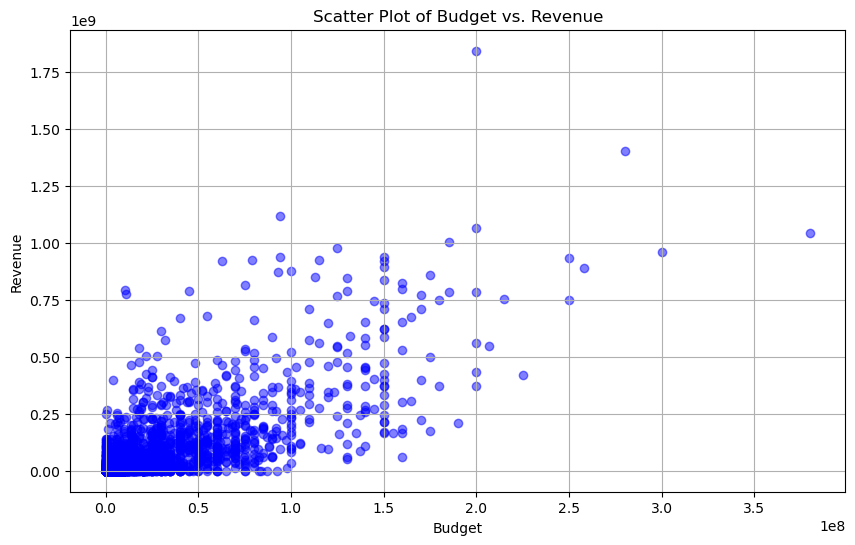

In [225]:
# Extract 'budget' and 'revenue' columns
budget = merged_df['budget']
revenue = merged_df['revenue']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(budget, revenue, color='blue', alpha=0.5)
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

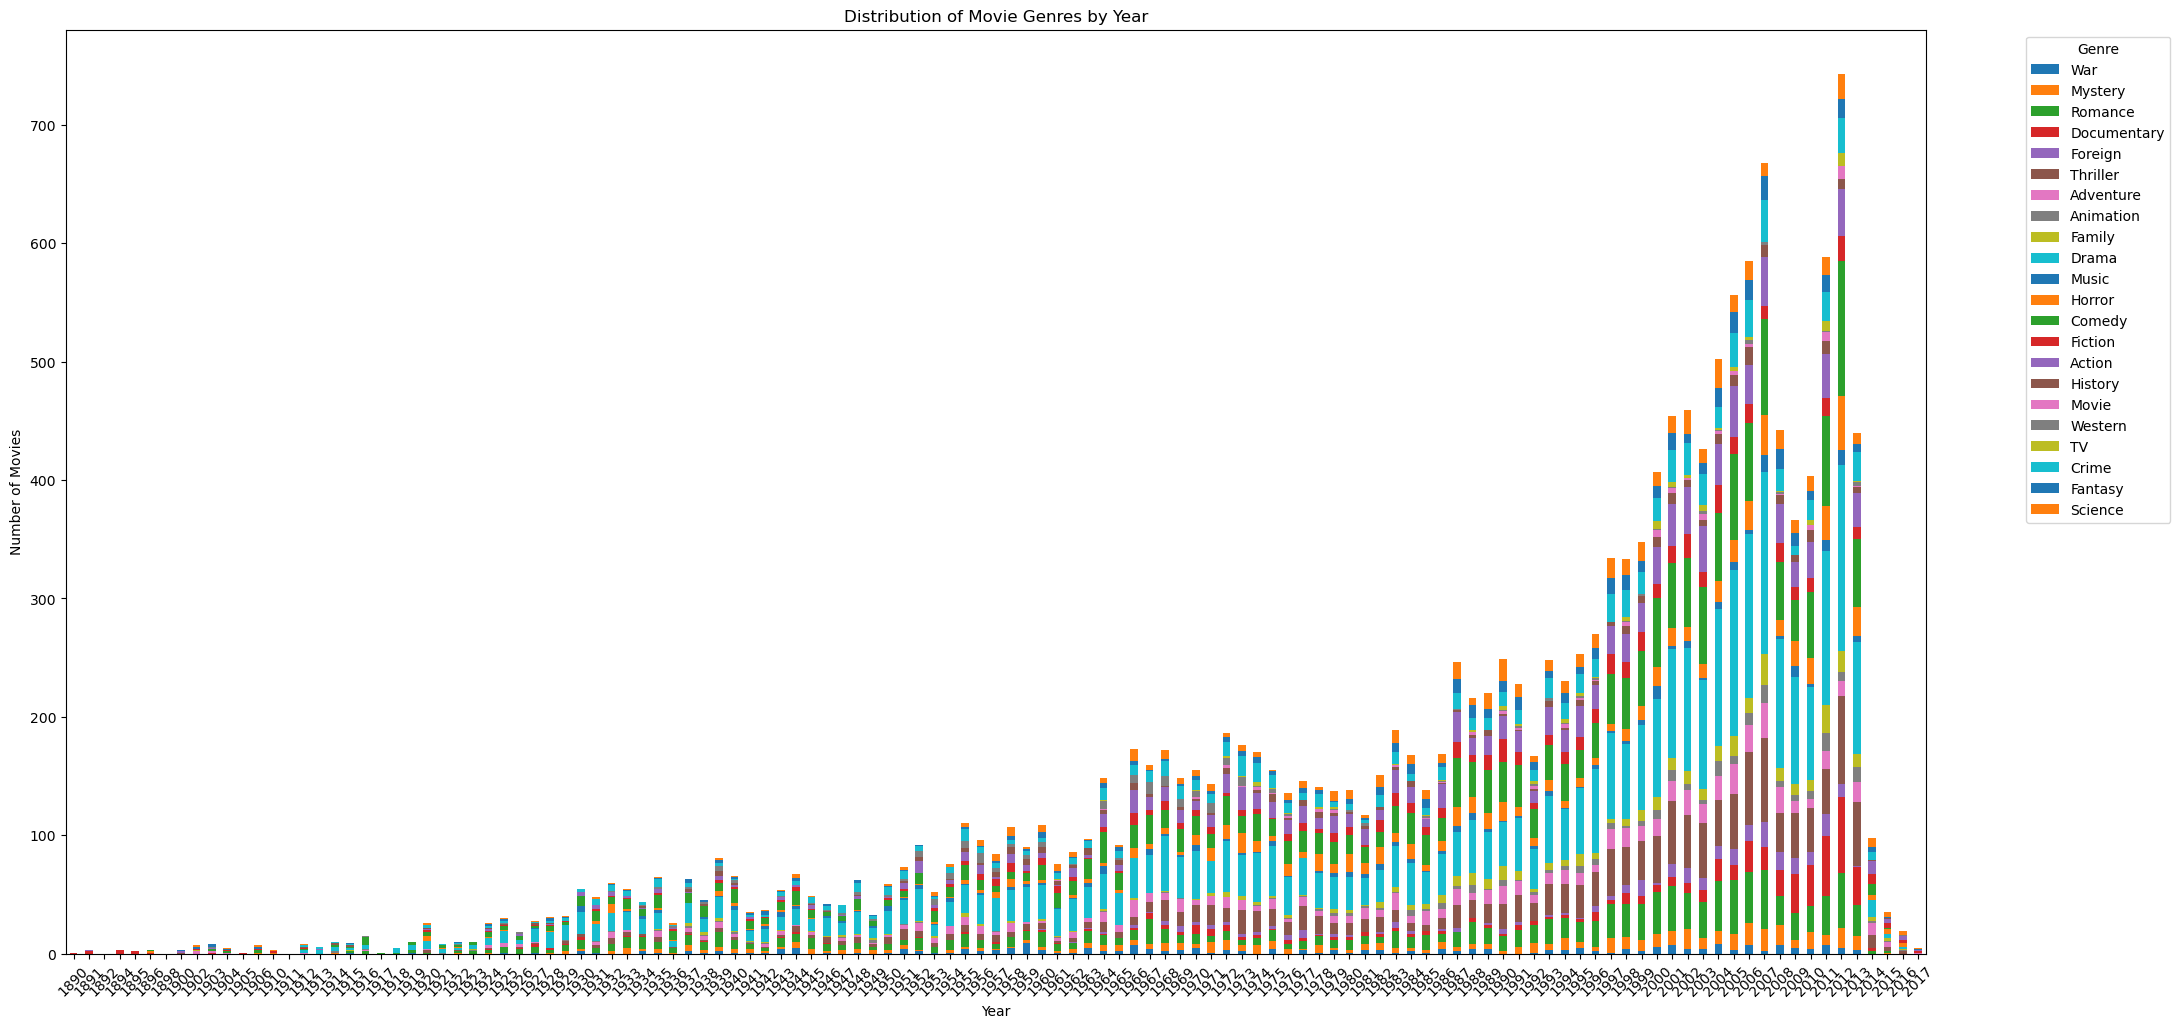

In [226]:
# Convert 'release_date' to datetime format and extract the year
merged_df['release_year'] = pd.to_datetime(merged_df['release_date']).dt.year

# Group the data by year and genre, and count occurrences
genre_counts_by_year = merged_df.groupby(['release_year'])[genres].sum().reset_index()

# Set the years as the index
genre_counts_by_year.set_index('release_year', inplace=True)

# Plot the stacked bar chart with adjusted figure size and subplot spacing
fig, ax = plt.subplots(figsize=(24, 12))  # Adjust figure size as needed
genre_counts_by_year.plot(kind='bar', stacked=True, ax=ax)
plt.title('Distribution of Movie Genres by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

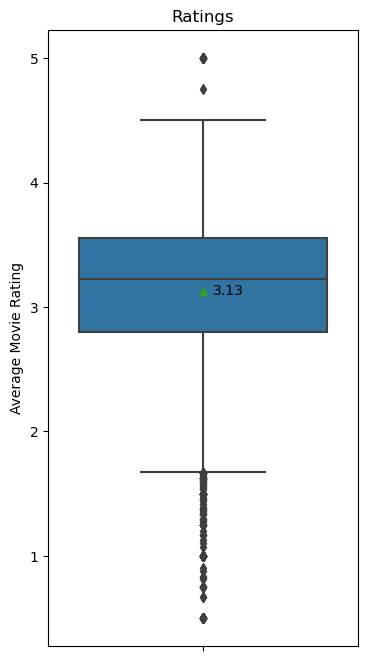

In [227]:
# Create a boxplot of ratings
plt.figure(figsize=(4, 8))
sns.boxplot(data=merged_df, y='mean_rating', showmeans=True, showfliers=True)
plt.title('Ratings')
plt.ylabel('Average Movie Rating')


# Display numerical values at the mean
means = merged_df['mean_rating'].mean()
plt.text(0.08, means, f'{means:.2f}', ha='center', va='center', color='black', fontsize=10)

plt.show()

In [228]:
merged_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,production_company,production_country,belongs_to_collection_binary,homepage_binary,History,Fantasy,Mystery,Horror,War,Western,Fiction,TV,Crime,Drama,Movie,Animation,Action,Family,Documentary,Romance,Science,Music,Adventure,Comedy,Foreign,Thriller,status_In Production,status_Post Production,status_Released,status_Rumored,mean_rating,release_year
0,False,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,False,7.70,5415.00,116985.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,False,False,True,False,3.60,1995
1,False,65000000,8844,en,17.02,1995-12-15,262797249.00,104.00,Jumanji,False,6.90,2413.00,78763.00,TriStar Pictures Teitler Film Interscope Commu...,United States of America,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,False,False,True,False,3.76,1995
2,False,60000000,949,en,17.92,1995-12-15,187436818.00,170.00,Heat,False,7.70,1886.00,48028.00,Regency Enterprises Forward Pass Warner Bros.,United States of America,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,False,False,True,False,3.91,1995
3,False,58000000,710,en,14.69,1995-11-16,352194034.00,130.00,GoldenEye,False,6.60,1194.00,115851.00,United Artists Eon Productions,United Kingdom United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,False,False,True,False,2.74,1995
4,False,98000000,1408,en,7.28,1995-12-22,10017322.00,119.00,Cutthroat Island,False,5.70,137.00,104691.00,Le Studio Canal+ Laurence Mark Productions Met...,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,False,False,True,False,3.71,1995


In [230]:
merged_df['adult'].unique()

array(['False', 'True'], dtype=object)

In [231]:
merged_df['video'].unique()

array([False, True], dtype=object)

In [232]:
# Convert 'adult' column to boolean with custom mapping, handling NaN values
merged_df['adult'] = merged_df['adult'].map({'False': False, 'True': True})

# Convert 'video' column to boolean directly
merged_df['video'] = merged_df['video'].astype(bool)


# Convert boolean columns to integers
boolean_columns = merged_df.select_dtypes(include=['bool']).columns
merged_df[boolean_columns] = merged_df[boolean_columns].astype(int)

# Check unique values in 'adult' and 'video' columns
print(merged_df['adult'].unique())
print(merged_df['video'].unique())

[0 1]
[0 1]


In [273]:
merged_df.head()

,adult,budget,id,original_language,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,imdbId,production_company,production_country,belongs_to_collection_binary,homepage_binary,History,Fantasy,Mystery,Horror,War,Western,Fiction,TV,Crime,Drama,Movie,Animation,Action,Family,Documentary,Romance,Science,Music,Adventure,Comedy,Foreign,Thriller,status_In Production,status_Post Production,status_Released,status_Rumored,mean_rating,release_year
0,0,30000000,862,en,21.95,1995-10-30,373554033.00,81.00,Toy Story,0,7.70,5415.00,116985.00,Pixar Animation Studios,United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,3.60,1995
1,0,65000000,8844,en,17.02,1995-12-15,262797249.00,104.00,Jumanji,0,6.90,2413.00,78763.00,TriStar Pictures Teitler Film Interscope Commu...,United States of America,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,3.76,1995
2,0,60000000,949,en,17.92,1995-12-15,187436818.00,170.00,Heat,0,7.70,1886.00,48028.00,Regency Enterprises Forward Pass Warner Bros.,United States of America,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,3.91,1995
3,0,58000000,710,en,14.69,1995-11-16,352194034.00,130.00,GoldenEye,0,6.60,1194.00,115851.00,United Artists Eon Productions,United Kingdom United States of America,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,2.74,1995
4,0,98000000,1408,en,7.28,1995-12-22,10017322.00,119.00,Cutthroat Island,0,5.70,137.00,104691.00,Le Studio Canal+ Laurence Mark Productions Met...,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,3.71,1995


In [251]:
len(merged_df)

7554

In [250]:
# Calculate Q1 and Q3
Q1 = merged_df['budget'].quantile(0.25)
Q3 = merged_df['budget'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with budget values outside the bounds
merged_df_filtered = merged_df[(merged_df['budget'] >= lower_bound) & (merged_df['budget'] <= upper_bound)]

# Verify the number of rows removed
rows_removed = len(merged_df) - len(merged_df_filtered)
print(f"Number of rows removed: {rows_removed}")

# Proceed with modeling using merged_df_filtered

Number of rows removed: 1679


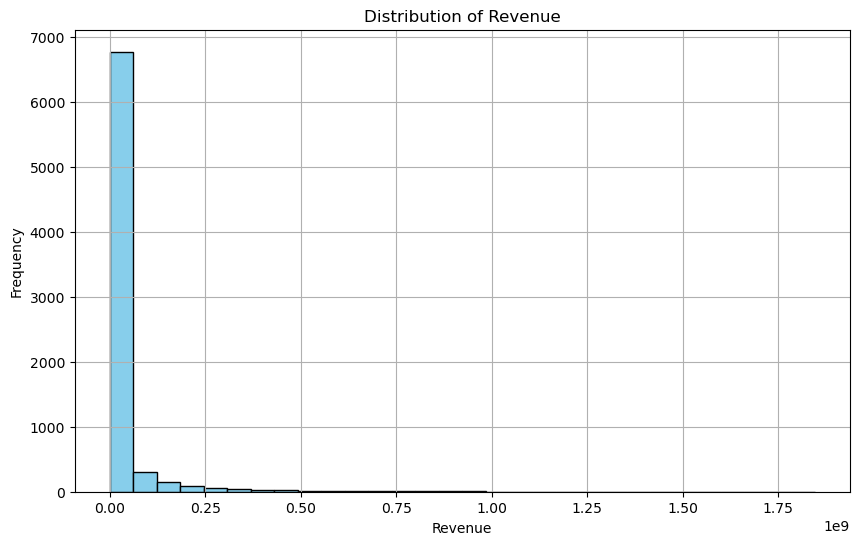

In [276]:
# Plot revenue
plt.figure(figsize=(10, 6))
plt.hist(merged_df['revenue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

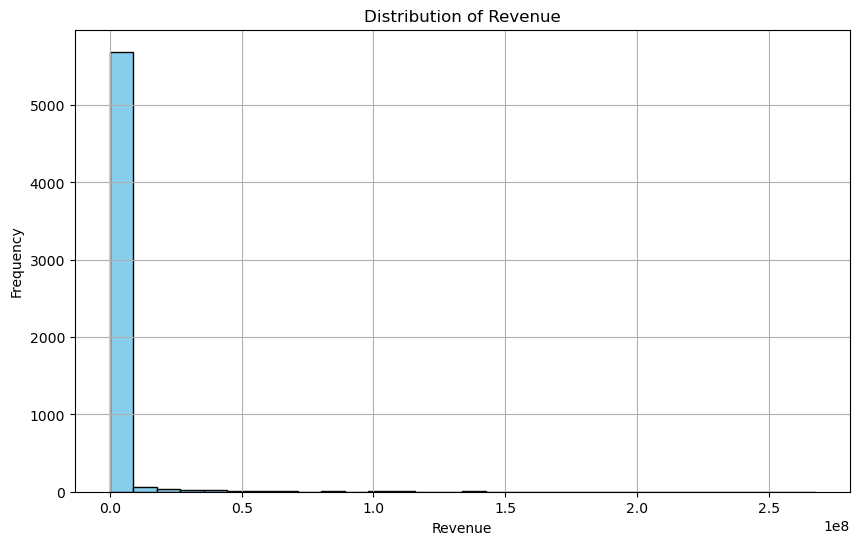

In [275]:
# Plot revenue
plt.figure(figsize=(10, 6))
plt.hist(merged_df_filtered['revenue'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [327]:
# Feature Selection
genre_features = ['History', 'Fantasy', 'Mystery', 'Horror', 'War', 'Western', 
                  'Fiction', 'TV', 'Crime', 'Drama', 'Movie', 'Animation', 
                  'Action', 'Family', 'Documentary', 'Romance', 'Science', 
                  'Music', 'Adventure', 'Comedy', 'Foreign', 'Thriller']

In [328]:
# Select binary and categorical features
binary_features = ['belongs_to_collection_binary', 'homepage_binary',
                   'status_In Production', 'status_Post Production', 
                   'status_Released', 'status_Rumored', 'adult', 'video']

In [329]:
# Select numerical features
numerical_features = ['budget', 'runtime', 'revenue', 'popularity']

In [330]:
# Feature Selection
X = merged_df[numerical_features + binary_features + genre_features]
y = merged_df[ 'mean_rating']

In [331]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [332]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [333]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

In [334]:
# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

Linear Regression MAE: 0.47194148712096473
Linear Regression R^2: -0.0009071635991413363


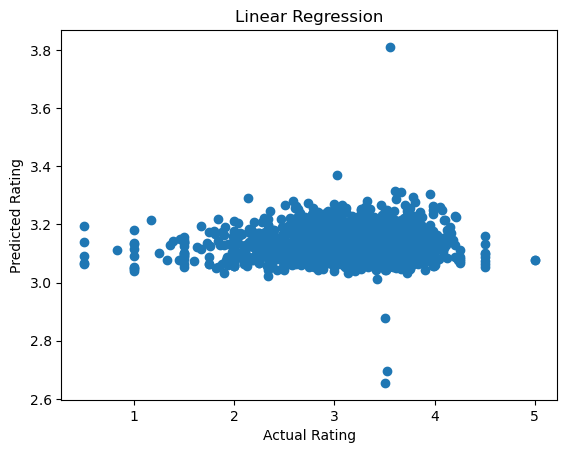

In [335]:
# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

In [336]:
# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [337]:
# Predict on the test set
y_pred_svr = svr.predict(X_test)

In [338]:
# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

SVM Regression MAE: 0.47470220354560677
SVM Regression R^2: -0.039631497786645875


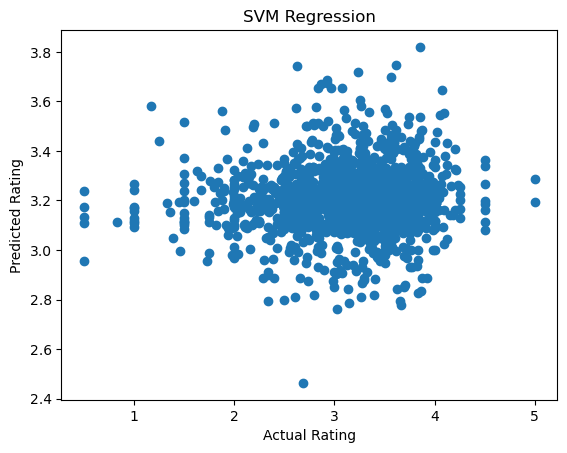

In [339]:
# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

In [340]:
# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

In [341]:
# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

Linear Regression MAE: 0.472
Linear Regression R^2: -0.001
SVM Regression MAE: 0.475
SVM Regression R^2: -0.039631497786645875


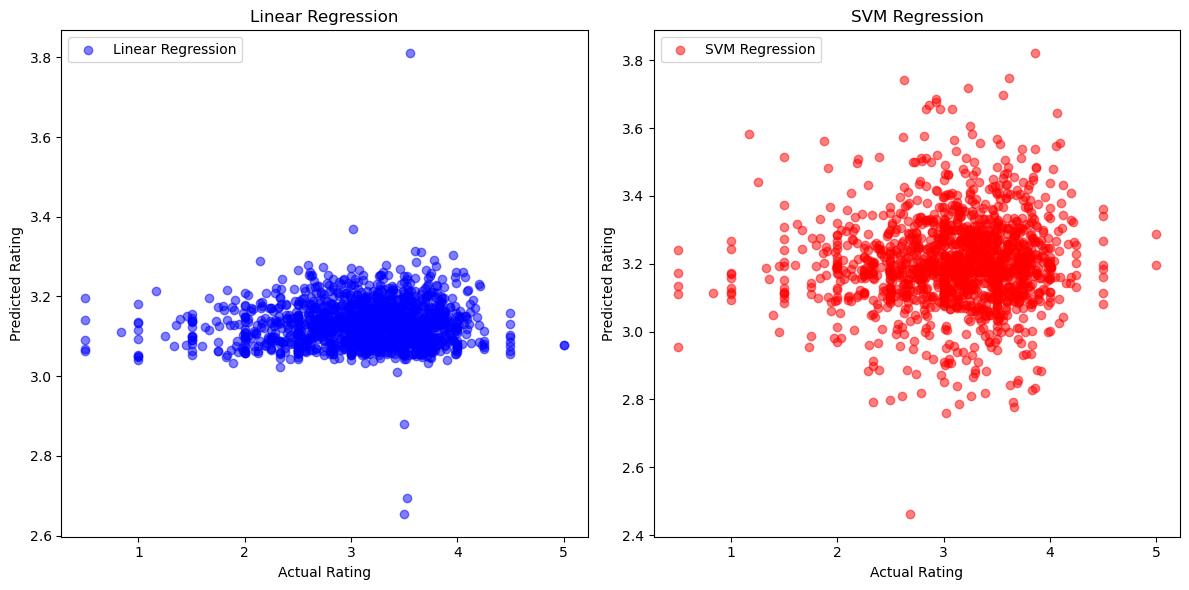

In [342]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Linear Regression MAE: 0.47135836954683047
Linear Regression R^2: 0.0011927765851768024


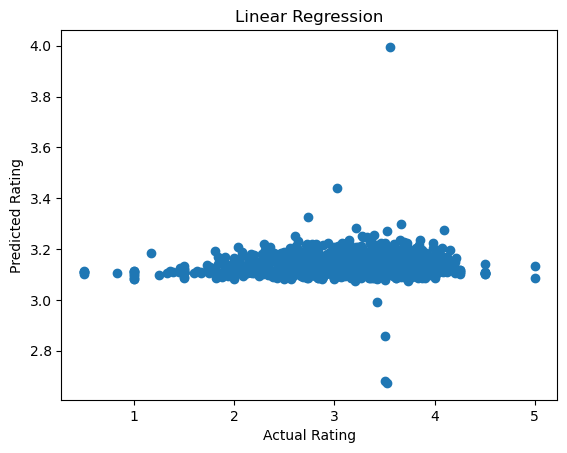

SVM Regression MAE: 0.4711297131561792
SVM Regression R^2: -0.03477844989126133


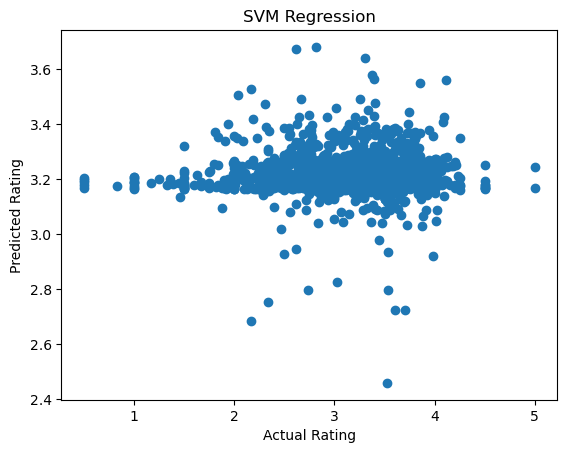

Linear Regression MAE: 0.471
Linear Regression R^2: 0.001
SVM Regression MAE: 0.471
SVM Regression R^2: -0.03477844989126133


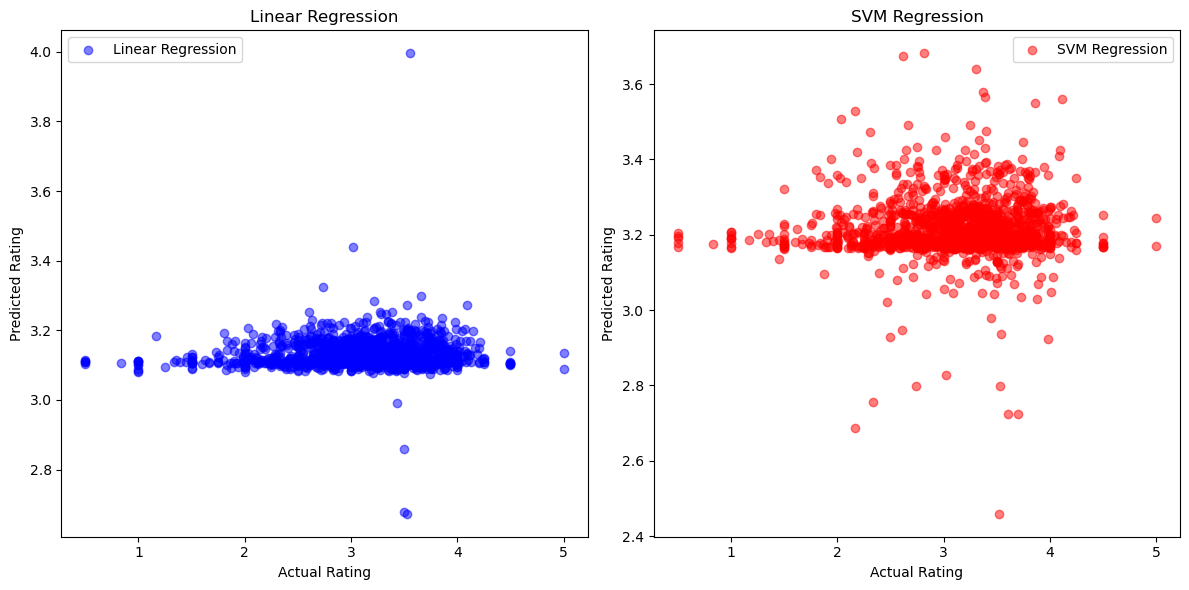

In [343]:
#Running predictions taking out genre features

# Feature Selection
X = merged_df[numerical_features + binary_features]
y = merged_df[ 'mean_rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Linear Regression MAE: 0.4709398278818535
Linear Regression R^2: 0.0019063258078049206


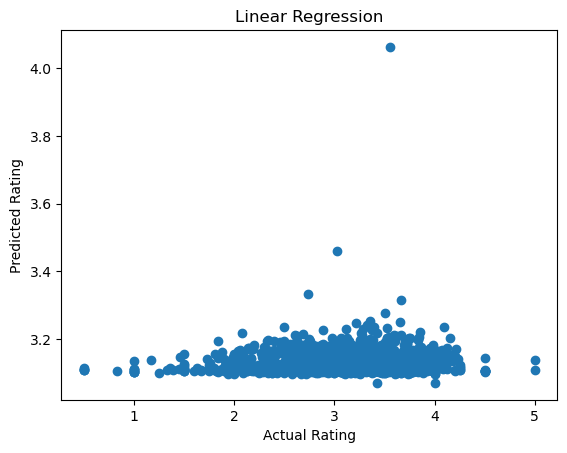

SVM Regression MAE: 0.4705068822062326
SVM Regression R^2: -0.03384376948347878


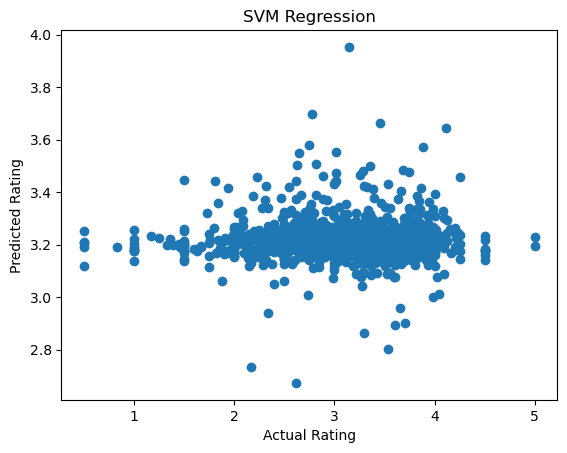

Linear Regression MAE: 0.471
Linear Regression R^2: 0.002
SVM Regression MAE: 0.471
SVM Regression R^2: -0.03384376948347878


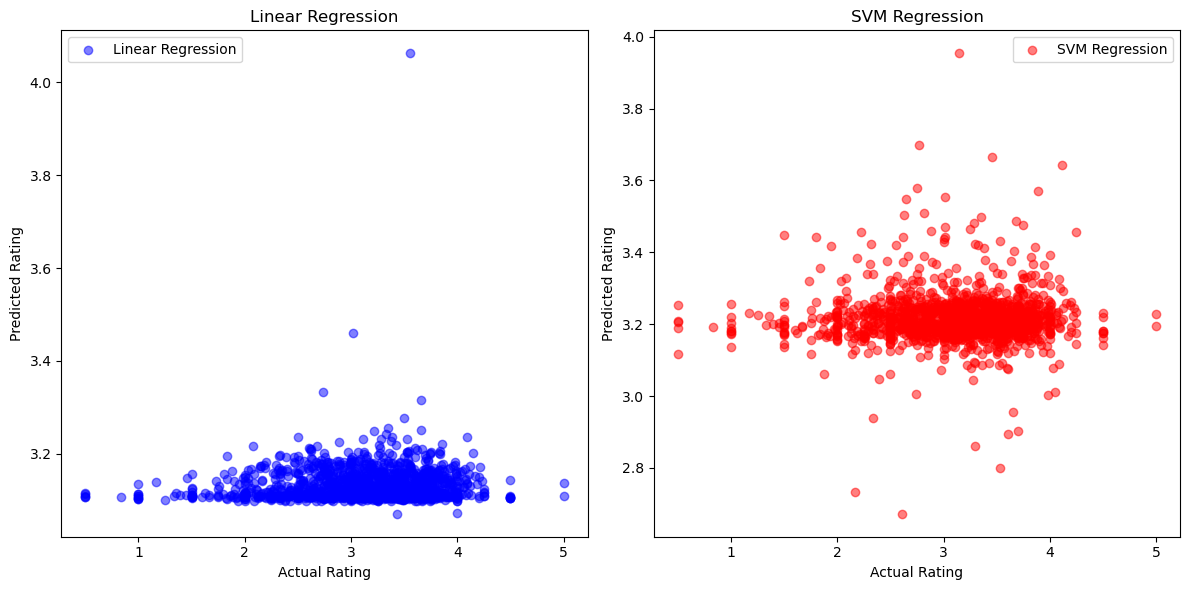

In [348]:
#Running predictions taking out binary and genre features

# Select numerical features
numerical_features = ['budget', 'runtime', 'revenue', 'popularity']

# Feature Selection
X = merged_df[numerical_features]
y = merged_df[ 'mean_rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Linear Regression MAE: 0.47155551831353487
Linear Regression R^2: -0.0003486733258890595


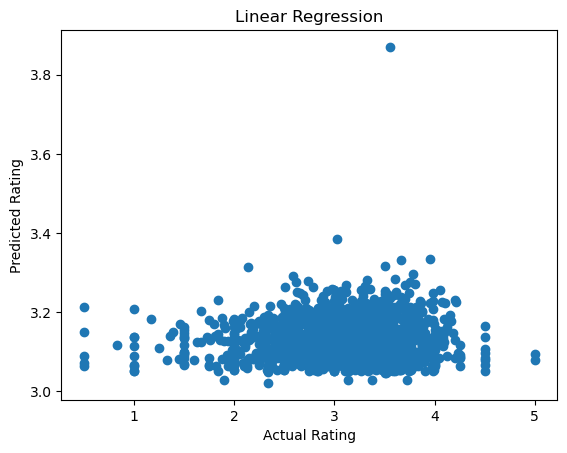

SVM Regression MAE: 0.4722166995335708
SVM Regression R^2: -0.0327126471989263


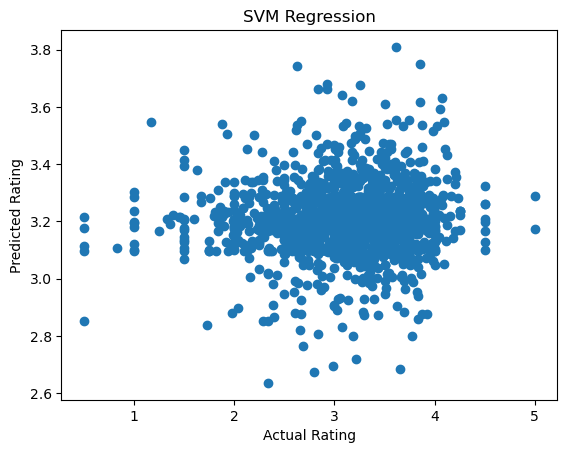

Linear Regression MAE: 0.472
Linear Regression R^2: -0.0
SVM Regression MAE: 0.472
SVM Regression R^2: -0.0327126471989263


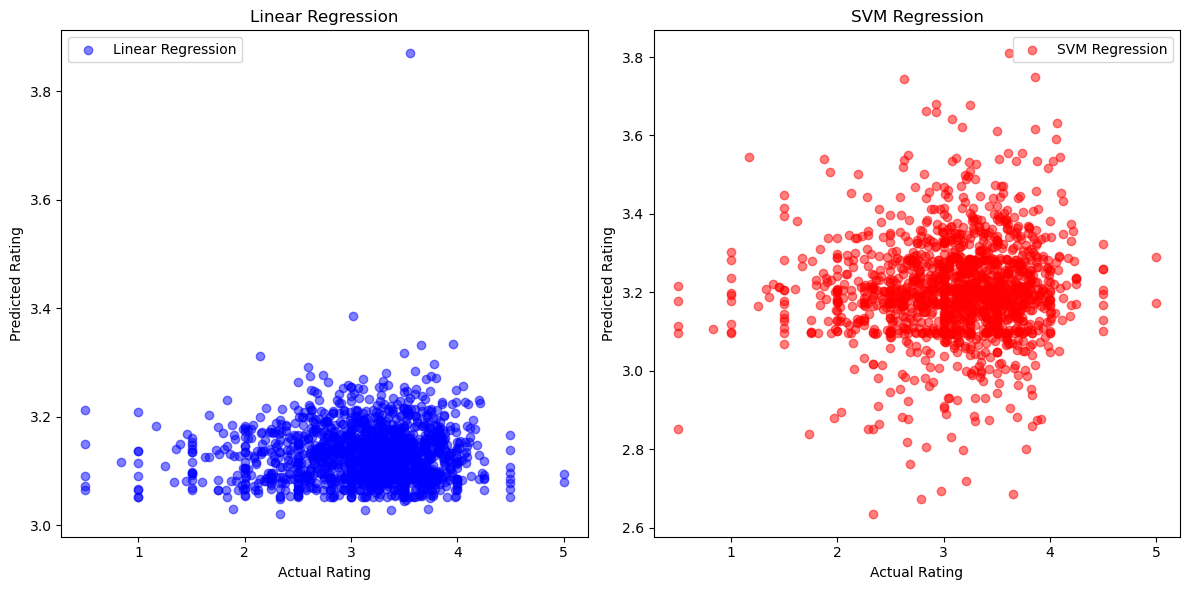

In [345]:
#Running predictions taking out binary and 'runtime' features

# Select numerical features
numerical_features = ['budget', 'revenue', 'popularity']

# Feature Selection
X = merged_df[numerical_features + genre_features]
y = merged_df[ 'mean_rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [346]:
merged_df.columns

Index(['adult', 'budget', 'id', 'original_language', 'popularity',
       'release_date', 'revenue', 'runtime', 'title', 'video', 'vote_average',
       'vote_count', 'imdbId', 'production_company', 'production_country',
       'belongs_to_collection_binary', 'homepage_binary', 'History', 'Fantasy',
       'Mystery', 'Horror', 'War', 'Western', 'Fiction', 'TV', 'Crime',
       'Drama', 'Movie', 'Animation', 'Action', 'Family', 'Documentary',
       'Romance', 'Science', 'Music', 'Adventure', 'Comedy', 'Foreign',
       'Thriller', 'status_In Production', 'status_Post Production',
       'status_Released', 'status_Rumored', 'mean_rating', 'release_year'],
      dtype='object')

Linear Regression MAE: 0.47162663607914335
Linear Regression R^2: 0.0012223635140168332


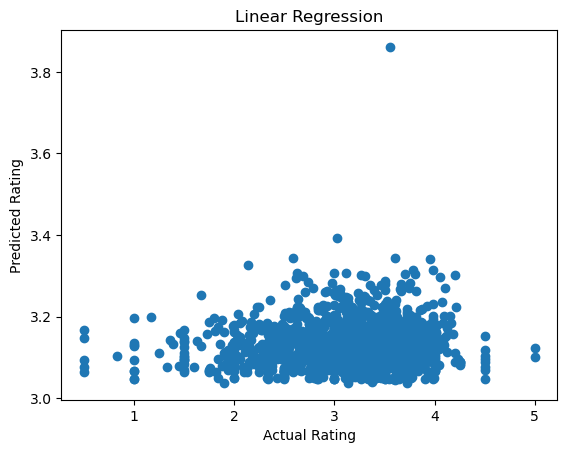

SVM Regression MAE: 0.47349014821647845
SVM Regression R^2: -0.03751341450777357


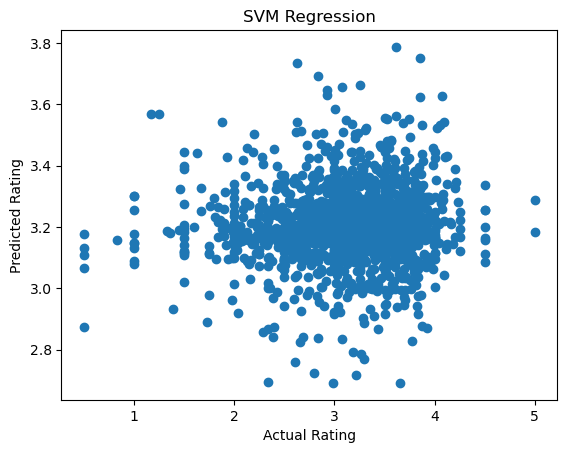

Linear Regression MAE: 0.472
Linear Regression R^2: 0.001
SVM Regression MAE: 0.473
SVM Regression R^2: -0.03751341450777357


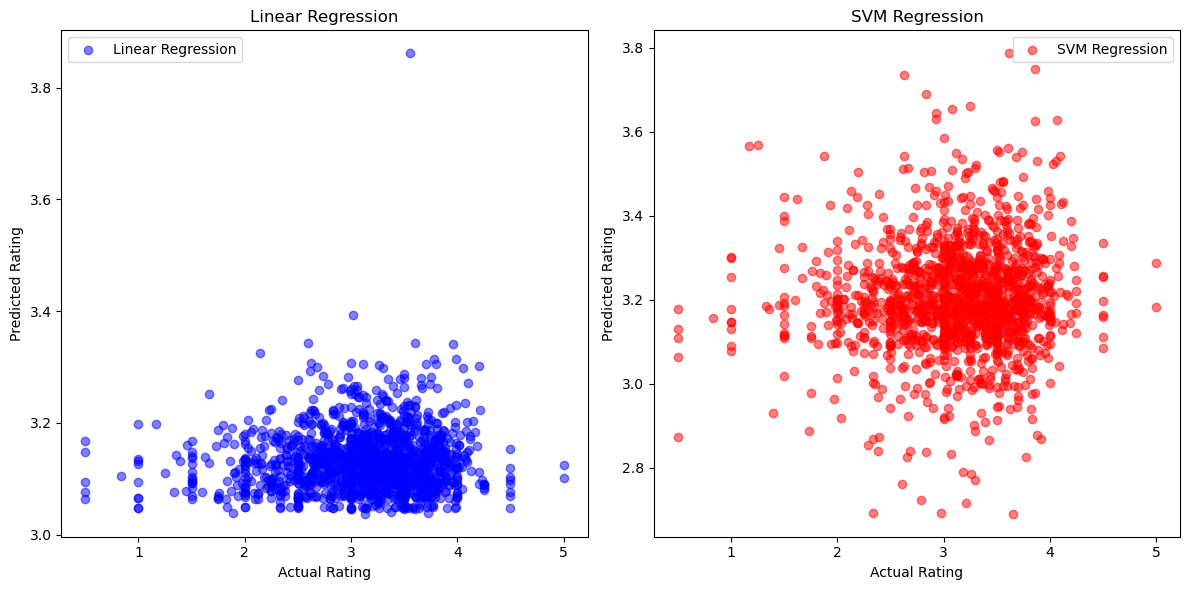

In [347]:
#Running predictions taking out binary and 'runtime' features

# Select numerical features
numerical_features = ['budget', 'runtime', 'revenue', 'popularity']

# Feature Selection
X = merged_df[numerical_features + genre_features]
y = merged_df[ 'mean_rating']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)


y_pred_linear = linear_reg.predict(X_test)

# Evaluation
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')

# Plot for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Linear Regression')
plt.show()

# SVM Regression
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Predict on the test set
y_pred_svr = svr.predict(X_test)

# Evaluation
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')

# Plot for SVM Regression

plt.scatter(y_test, y_pred_svr)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('SVM Regression')

plt.show()

# Round results to 3rd decimal
mae_linear = round(mae_linear, 3)
r2_linear = round(r2_linear, 3)

mae_svr = round(mae_svr, 3)
r2_linear = round(r2_linear, 3)

# Print values of linear and SVM

print(f'Linear Regression MAE: {mae_linear}')
print(f'Linear Regression R^2: {r2_linear}')
print(f'SVM Regression MAE: {mae_svr}')
print(f'SVM Regression R^2: {r2_svr}')


# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Linear Regression
axs[0].scatter(y_test, y_pred_linear, alpha=0.5, label='Linear Regression', color='blue')
axs[0].set_xlabel('Actual Rating')
axs[0].set_ylabel('Predicted Rating')
axs[0].set_title('Linear Regression')
axs[0].legend()

# Plot for SVM Regression
axs[1].scatter(y_test, y_pred_svr, alpha=0.5, label='SVM Regression', color='red')
axs[1].set_xlabel('Actual Rating')
axs[1].set_ylabel('Predicted Rating')
axs[1].set_title('SVM Regression')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()